# **Cấu hình ban đầu trên Colab:**

In [ ]:
# Kiểm tra phiên bản PyTorch (thường đã có sẵn trên Colab)
import torch
print("Phiên bản PyTorch:", torch.__version__)  # In version (ví dụ: 2.4.0+cu121)

# Nếu cần cập nhật hoặc cài đặt (thường không cần, nhưng để chắc chắn)
!pip install --upgrade torch torchvision torchaudio requests pillow  # Cài đặt hoặc update thư viện cần thiết

Phiên bản PyTorch: 2.8.0+cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 848.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━

---
Tải mô hình ResNet50 đã huấn luyện trước và hiển thị cấu trúc

---



In [ ]:
import torch  # Import thư viện PyTorch
from torchvision import models  # Import module models từ torchvision để tải mô hình

# Tải mô hình ResNet50 đã huấn luyện trước trên ImageNet
model = models.resnet50(pretrained=True)  # pretrained=True để sử dụng trọng số đã huấn luyện
model.eval()  # Chuyển mô hình sang chế độ đánh giá (không huấn luyện)

# Hiển thị cấu trúc mô hình để hiểu các layer
print("Cấu trúc mô hình ResNet50:\n", model)  # In cấu trúc mô hình



/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 119MB/s]


Cấu trúc mô hình ResNet50:
 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, ker

Preprocess hình ảnh từ dataset Oxford-IIIT Pet để chuẩn bị input cho ResNet

---



In [ ]:
import torch  # Import PyTorch
from torchvision import transforms, datasets  # Import transforms và datasets
from PIL import Image  # Import PIL để xử lý hình ảnh

# Định nghĩa các phép biến đổi để preprocess hình ảnh (theo chuẩn ImageNet)
preprocess = transforms.Compose([
    transforms.Resize(256),  # Thay đổi kích thước hình ảnh về 256 pixel (giữ tỷ lệ)
    transforms.CenterCrop(224),  # Cắt trung tâm về 224x224 (kích thước input của ResNet)
    transforms.ToTensor(),  # Chuyển sang tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Chuẩn hóa theo mean/std của ImageNet
])

# Tải dataset Oxford-IIIT Pet từ mạng (torchvision tự tải nếu chưa có)
dataset = datasets.OxfordIIITPet(root='./data', download=True, transform=preprocess)  # Tải dataset thú cưng (chó, mèo)

# Lấy một mẫu hình ảnh từ dataset (ví dụ index 0)
img, label = dataset[0]  # Lấy hình và nhãn (label là số, nhưng dataset có chó/mèo)
input_batch = img.unsqueeze(0)  # Thêm chiều batch (1, 3, 224, 224)

print("Kích thước input sau preprocess:", input_batch.shape)  # In kích thước tensor



100%|██████████| 792M/792M [00:18<00:00, 42.4MB/s]
100%|██████████| 19.2M/19.2M [00:00<00:00, 21.7MB/s]


Kích thước input sau preprocess: torch.Size([1, 3, 224, 224])


Sử dụng ResNet để nhận dạng hình ảnh thú cưng từ dataset Oxford-IIIT Pet

---



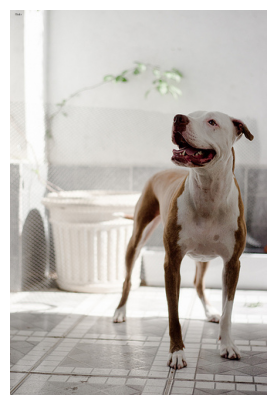

Nhãn dự đoán: Great Dane


In [ ]:
import torch  # Import PyTorch
import requests  # Import requests để tải nhãn (nếu cần, đã có sẵn trên Colab)
import matplotlib.pyplot as plt # Import matplotlib để hiển thị hình
from PIL import Image  # Import PIL để xử lý hình ảnh
from torchvision import models, transforms, datasets  # Import models, transforms, datasets

# Tải mô hình ResNet50 pretrained
model = models.resnet50(pretrained=True)  # Tải mô hình từ mạng
model.eval()  # Chế độ đánh giá

# Tải dataset Oxford-IIIT Pet từ mạng
dataset = datasets.OxfordIIITPet(root='/content/data', download=True)  # Tải dataset

# Preprocess cho một mẫu
preprocess = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Lấy mẫu hình ảnh (ví dụ index 100, thường là mèo hoặc chó)
img, _ = dataset[100]  # Lấy hình (bỏ nhãn gốc vì dùng ImageNet labels)
input_tensor = preprocess(img)  # Preprocess
input_batch = input_tensor.unsqueeze(0)  # Thêm batch

# Dự đoán
with torch.no_grad():  # Không tính gradient
    output = model(input_batch)  # Chạy mô hình

# Tải nhãn ImageNet từ URL trên mạng
response = requests.get('https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt')
labels = response.text.splitlines()  # Tách thành list

# Hiển thị hình ảnh trực tiếp trong Colab
plt.figure(figsize=(5, 5))  # Tạo figure với kích thước
plt.imshow(img)  # Vẽ hình (PIL Image tự động tương thích)
plt.axis('off')  # Tắt trục
plt.show()  # Hiển thị

# Lấy lớp dự đoán cao nhất
probabilities = torch.nn.functional.softmax(output[0], dim=0)  # Softmax
top_prob, top_catid = torch.topk(probabilities, 1)  # Lấy top 1

print("Nhãn dự đoán:", labels[top_catid[0]])  # In nhãn (ví dụ: 'Abyssinian' cho mèo)


Tải hình ảnh từ URL trên mạng và nhận dạng thú cưng

---



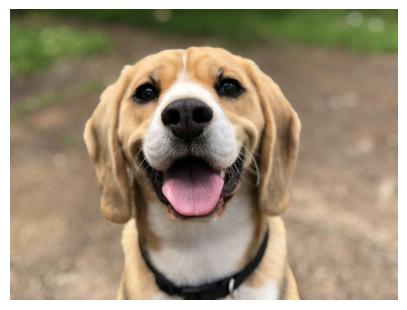

Nhãn dự đoán: beagle


In [ ]:
import torch  # Import PyTorch
import requests  # Import để tải hình và nhãn
import matplotlib.pyplot as plt  # Import để hiển thị hình
from io import BytesIO  # Import để đọc bytes (đã có sẵn)
from torchvision import models, transforms  # Import cần thiết
from PIL import Image  # Import PIL

# Tải mô hình và nhãn từ mạng
model = models.resnet50(pretrained=True).eval()  # Tải mô hình
labels = requests.get('https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt').text.splitlines()

# Preprocess
preprocess = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# URL hình ảnh thú cưng từ mạng (ví dụ: chó từ Unsplash)
url = 'https://images.unsplash.com/photo-1543466835-00a7907e9de1'  # URL chó công khai
response = requests.get(url)  # Tải hình từ URL
img = Image.open(BytesIO(response.content))  # Mở từ bytes

# Hiển thị hình ảnh trực tiếp trong Colab
plt.figure(figsize=(5, 5))  # Tạo figure với kích thước
plt.imshow(img)  # Vẽ hình (PIL Image tự động tương thích)
plt.axis('off')  # Tắt trục
plt.show()  # Hiển thị

# Dự đoán
input_batch = preprocess(img).unsqueeze(0)  # Preprocess
with torch.no_grad():
    output = model(input_batch)  # Chạy model
top_catid = torch.nn.functional.softmax(output[0], dim=0).argmax()  # Lấy top
print("Nhãn dự đoán:", labels[top_catid])  # In



Hiển thị top 5 lớp dự đoán cho hình ảnh từ dataset Oxford-IIIT Pet

---



In [ ]:
import torch  # Import PyTorch
import requests  # Import cho nhãn
from torchvision import models, transforms, datasets  # Import

# Tải mô hình và nhãn từ mạng
model = models.resnet50(pretrained=True).eval()
labels = requests.get('https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt').text.splitlines()

# Preprocess
preprocess = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Tải dataset và lấy mẫu (index 200)
dataset = datasets.OxfordIIITPet(root='/content/data', download=True)  # Tải dataset
img, _ = dataset[200]  # Lấy hình
input_batch = preprocess(img).unsqueeze(0)

# Dự đoán và lấy top 5
with torch.no_grad():
    output = model(input_batch)
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)  # Top 5
for i in range(5):
    print(f"Top {i+1}: {labels[top5_catid[i]]} với xác suất {top5_prob[i]:.4f}")


Top 1: beagle với xác suất 0.7666
Top 2: Walker hound với xác suất 0.1892
Top 3: English foxhound với xác suất 0.0241
Top 4: basset với xác suất 0.0064
Top 5: bluetick với xác suất 0.0061
